# Q. 1.
Perform pre-processing on the full dataset

In [70]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from statsmodels.formula.api import ols, logit

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
from statsmodels.graphics.mosaicplot import mosaic

In [66]:
#create and examine bottle dataframe
bottle_df = pd.read_csv("../dataset/bottle.csv", low_memory=False)
bottle_df.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
# Delete columns containing either 25% or more than 25% NaN Values
perc = 50
min_count =  int(((100-perc)/100)*bottle_df.shape[0] + 1)
bottle_df.dropna(axis=1, thresh=min_count, inplace=True)

In [45]:
#dropping columns with multiple NaN values
bottle_df.drop((['Sta_ID','Depth_ID']), axis=1, inplace=True)
bottle_df.dropna(axis=0, subset=['T_degC'], inplace = True)

In [46]:
# Using interpolate to replace remaning NaNs
bottle_df = bottle_df.interpolate()

In [48]:
#standardadize the data
bottle_df_std=bottle_df.select_dtypes(include=[np.number])
bottle_df_std

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,RecInd,...,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_PRES
0,1,1,0,10.500,33.4400,NaN,25.64900,NaN,NaN,3,...,0.0,10.50,10.50,33.440,25.640,233.0,0.000,NaN,NaN,0
1,1,2,8,10.460,33.4400,NaN,25.65600,NaN,NaN,3,...,8.0,10.46,10.46,33.440,25.650,232.5,0.010,NaN,NaN,8
2,1,3,10,10.460,33.4370,NaN,25.65400,NaN,NaN,7,...,10.0,10.46,10.46,33.437,25.650,232.8,0.020,NaN,NaN,10
3,1,4,19,10.450,33.4200,NaN,25.64300,NaN,NaN,3,...,19.0,10.45,10.45,33.420,25.640,234.1,0.040,NaN,NaN,19
4,1,5,20,10.450,33.4210,NaN,25.64300,NaN,NaN,7,...,20.0,10.45,10.45,33.421,25.640,234.0,0.040,NaN,NaN,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864858,34404,864859,0,18.744,33.4083,5.805,23.87055,108.74,253.47,7,...,0.0,18.74,18.74,33.408,23.871,402.4,0.000,5.81,108.7,0
864859,34404,864860,2,18.744,33.4083,5.805,23.87072,108.74,253.47,3,...,2.0,18.74,18.74,33.408,23.871,402.5,0.008,5.81,108.7,2
864860,34404,864861,5,18.692,33.4150,5.796,23.88911,108.46,253.06,3,...,5.0,18.69,18.69,33.415,23.889,400.8,0.020,5.80,108.5,5
864861,34404,864862,10,18.161,33.4062,5.816,24.01426,107.74,253.92,3,...,10.0,18.16,18.16,33.406,24.014,389.1,0.040,5.82,107.7,10


In [49]:
#replace remaining NaNs with average of DataFrame
bot_df= bottle_df_std.fillna(bottle_df_std.mean())
bot_df

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,RecInd,...,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_PRES
0,1,1,0,10.500,33.4400,3.4242,25.64900,59.050934,152.345642,3,...,0.0,10.50,10.50,33.440,25.640,233.0,0.000,3.424225,59.087835,0
1,1,2,8,10.460,33.4400,3.4242,25.65600,59.050934,152.345642,3,...,8.0,10.46,10.46,33.440,25.650,232.5,0.010,3.424225,59.087835,8
2,1,3,10,10.460,33.4370,3.4242,25.65400,59.050934,152.345642,7,...,10.0,10.46,10.46,33.437,25.650,232.8,0.020,3.424225,59.087835,10
3,1,4,19,10.450,33.4200,3.4242,25.64300,59.050934,152.345642,3,...,19.0,10.45,10.45,33.420,25.640,234.1,0.040,3.424225,59.087835,19
4,1,5,20,10.450,33.4210,3.4242,25.64300,59.050934,152.345642,7,...,20.0,10.45,10.45,33.421,25.640,234.0,0.040,3.424225,59.087835,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864858,34404,864859,0,18.744,33.4083,5.8050,23.87055,108.740000,253.470000,7,...,0.0,18.74,18.74,33.408,23.871,402.4,0.000,5.810000,108.700000,0
864859,34404,864860,2,18.744,33.4083,5.8050,23.87072,108.740000,253.470000,3,...,2.0,18.74,18.74,33.408,23.871,402.5,0.008,5.810000,108.700000,2
864860,34404,864861,5,18.692,33.4150,5.7960,23.88911,108.460000,253.060000,3,...,5.0,18.69,18.69,33.415,23.889,400.8,0.020,5.800000,108.500000,5
864861,34404,864862,10,18.161,33.4062,5.8160,24.01426,107.740000,253.920000,3,...,10.0,18.16,18.16,33.406,24.014,389.1,0.040,5.820000,107.700000,10


In [50]:
#replace infinte values
bot_df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Q. 2
Perform feature selection (decide what columns should be included in your analysis). How did you figure out what features were important?

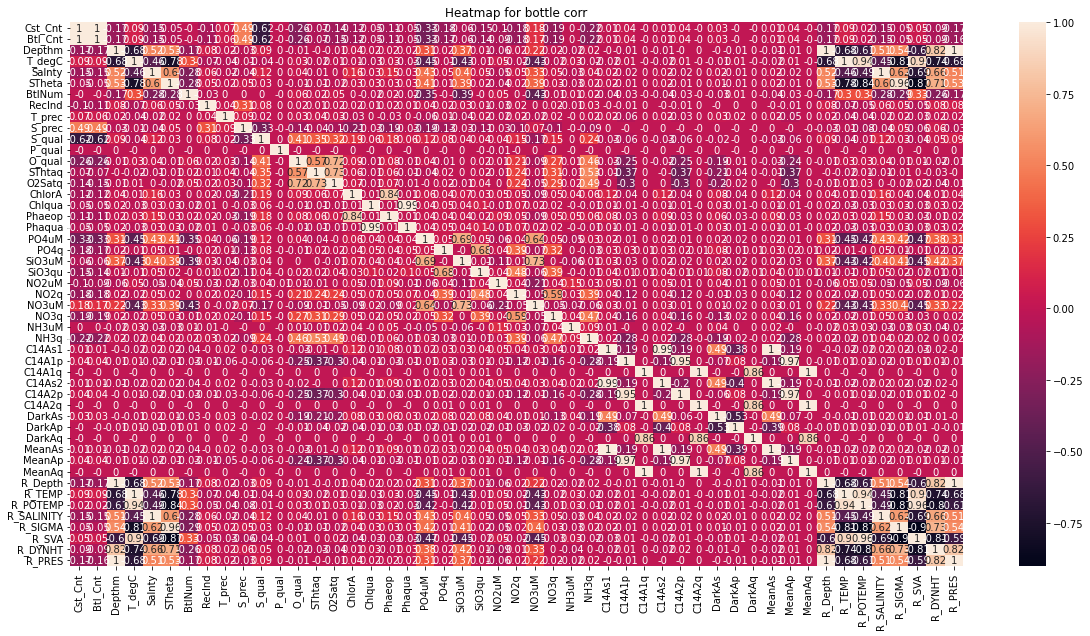

In [51]:
#perform correlation with temperature to see which have the highest correlation
correlation = bot_df.corr().round(2)
plt.subplots(1,1,figsize=(20,10))
sns.heatmap(corr, annot=True)
plt.title("Heatmap for bottle corr")
plt.show()

In [52]:
#Selecting highly correlated columns, we will ignore all reported value columns as they are duplicates
output_var=abs(correlation['T_degC'])
relevant_columns = output_var[output_var>0.5]
relevant_columns

Depthm         0.68
T_degC         1.00
O2ml_L         0.67
STheta         0.78
O2Sat          0.68
Oxy_µmol/Kg    0.63
R_Depth        0.68
R_TEMP         1.00
R_POTEMP       0.94
R_SIGMA        0.81
R_SVA          0.90
R_DYNHT        0.74
R_O2           0.67
R_O2Sat        0.68
R_PRES         0.68
Name: T_degC, dtype: float64

In [53]:
# columns we found from correlation
feature_columns=bot_df[['Depthm','T_degC', 'O2ml_L', 'STheta','O2Sat','Oxy_µmol/Kg']]
feature_df=pd.DataFrame(feature_columns)

X=feature_df.drop('T_degC', axis=1)
y=feature_df['T_degC']

In [59]:
#doing rfe to see top 6 features
estimator= LinearRegression()
selector = RFE(estimator, n_features_to_select=6)
selection= selector.fit(X,y)
print(selection.ranking_)
print(selection.support_)

[1 1 1 1 1]
[ True  True  True  True  True]


I selected the columns with the highest correlation with tempeature. On these, I did an RFE to get the rankings and details of the different features. 

# Q. 3.
Perform multiple linear regression on the dataset. Be sure to display the final resulting equation with the coefficients and intercept in markdown.  

In [62]:
#using OLS
mdl_Temp = ols("T_degC ~ Depthm * STheta",data=bot_df).fit()
mdl_Temp.params

Intercept        70.302117
Depthm           -0.082742
STheta           -2.249301
Depthm:STheta     0.002858
dtype: float64


The above regression model can be interpreted as below formula:

T_degC = (70) + (-0.08) Depthm + (-2.25) STheta + (0.003) Depthm * STheta


In [63]:
print("R squared value for the model is : ",mdl_Temp.rsquared)

R squared value for the model is :  0.7526260925425718


In [65]:
#using linear regression
X= bot_df[['Depthm', 'O2ml_L', 'STheta','O2Sat','Oxy_µmol/Kg']]
y= bot_df[['T_degC']]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=55)
reg=LinearRegression()
reg.fit(X_train,y_train)
print("Accuracy Score: ", reg.score(X_test,y_test).round(2)*100,'%')
y_pred=reg.predict(X_test)
print("Coefficients are: ", reg.coef_.round(4))
print("Intercept is: ",reg.intercept_.round(4))

Accuracy Score:  86.0 %
Coefficients are:  [[-0.0044  1.3878 -1.2178  0.304  -0.1418]]
Intercept is:  [42.1051]



Equation will be

T_degC= 42.1 + (-0.04xDepthm) + (1.39xSTheta) + (-1.22xO2Sat) + (-0.14xOxy_µmol/Kg)

# Q. 4.
Which regression approach had the “best” performance? Be sure to compare it to what you did last week. 

The single linear regression model from last week had an accuracy score of 0.2, so we already know it is not the best fit for this data. Now we compare the two Multiple Linear Regression models we have built. As we can see, the linear regression model has an accuracy score of 86%, this automatically leads us to believe that it is the 'better' model. Also, interepreting the model fit from their R squared values the multiple regression model clearly did better

# Q. 5. 
Work with the diabetes dataset to perform multiple logistic regression.  

In [67]:
#create and examine diabetes dataframe
diabetes_df = pd.read_csv("../dataset/diabetes.csv", low_memory=False)
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [68]:
mdl_outcome = logit("Outcome ~ Age+BMI",data=diabetes_df).fit()

mdl_outcome.params

Optimization terminated successfully.
         Current function value: 0.570101
         Iterations 6


Intercept   -5.403784
Age          0.045608
BMI          0.098250
dtype: float64

array([[434.,  66.],
       [175.,  93.]])

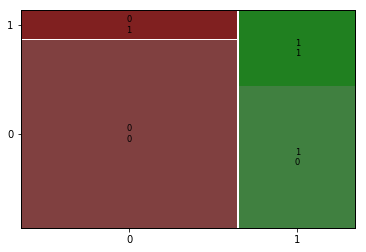

In [71]:
# Calculating accuracy
conf_matrix = mdl_outcome.pred_table()
display(conf_matrix)
mosaic(conf_matrix)
plt.show()

In [72]:
TN=conf_matrix[0,0]
FN=conf_matrix[1,0]
TP=conf_matrix[1,1]
FP=conf_matrix[0,1]

accuracy = (TP+TN)/(TN+TP+FN+FP)
accuracy

0.6861979166666666

In [73]:
mdl_outcome.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      765
Method:                           MLE   Df Model:                            2
Date:                Thu, 06 Jan 2022   Pseudo R-squ.:                  0.1186
Time:                        16:00:36   Log-Likelihood:                -437.84
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 2.619e-26
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.4038      0.515    -10.487      0.000      -6.414      -4.394
Age            0.0456      0.007      6.571      0.000       0.032       0.059
BMI            0.0982      0.012      7.874      0.000       0.074       0.123
==============================================================================
"""

# Q. 6.
What are the other ways to assess the performance of the model besides accuracy? What approach makes the most sense with the diabetes dataset? Why?  

The other ways to assess model performance are:

- Accuracy — Ratio of correct predictions to total prediction
- Sensitivity/Recall — Ratio of true positives to total (actual) positives in the data.
- Precision — Ratio of true positives to total predicted positives.
- Specificity — Ratio of true negatives to total negatives in the data
- F1-Score — Considers both precision and recall. It’s the harmonic mean of the precision and recall


In the case of diabetes data identifying the positives are crucial. Hence the best way to assess the model performance should be sensitivity.



In [74]:
sensitivity = TP/(TP+FN)
sensitivity

0.34701492537313433

# Q. 7.
Tune your model to improve performance based on the performance metric you identified in question 6. Look at the documentation for logistic regression in statsmodel and/or sklearn and see if you can tune the model performance based on available parameters

In [75]:
X=diabetes_df[["Age","BMI"]]
y=diabetes_df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

# Creating the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}
  
# Instantiating logistic regression classifier
logreg = LogisticRegression()
  
# Instantiating the GridSearchCV object
logreg_cv = GridSearchCV(logreg, param_grid, cv = 5)
  
mdl_outcome_tune = logreg_cv.fit(X_train, y_train)

array([[135,  22],
       [ 53,  21]], dtype=int64)

Sensitivity score post tuning the model is 0.28378378378378377


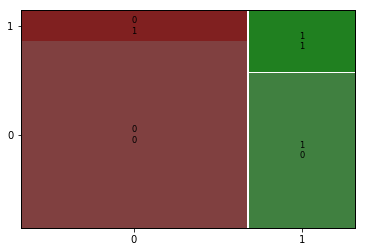

In [76]:
# Testing sensitivity score

y_pred = mdl_outcome_tune.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
display(conf_matrix)
TN=conf_matrix[0,0]
FN=conf_matrix[1,0]
TP=conf_matrix[1,1]
FP=conf_matrix[0,1]

print("Sensitivity score post tuning the model is {}".format(TP/(TP+FN)))
#Display confusion matrix

mosaic(conf_matrix)
plt.show()

# Q.8
Is the KNN model or the multiple logistic regression model more performant for the diabetes dataset? How can you tell?  

In [79]:
X = diabetes_df[['Glucose','BMI']]
y = diabetes_df['Outcome']

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

#Standardize
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=13).fit(X_train, y_train)

acc_score=knn.score(X_test, y_test).round(2)
y_predicted = knn.predict(X_test)

print("Accuracy Score from KNN method: ",acc_score*100,'%')
print("R squared from KNN: ",r2_score(y_test,y_predicted).round(2))
print("MSE from KNN: ",mean_squared_error(y_test,y_predicted).round(2))

Accuracy Score from KNN method:  75.0 %
R squared from KNN:  -0.09
MSE from KNN:  0.25


The KNN model does have a higher accuracy compared to the multiple linear regression model

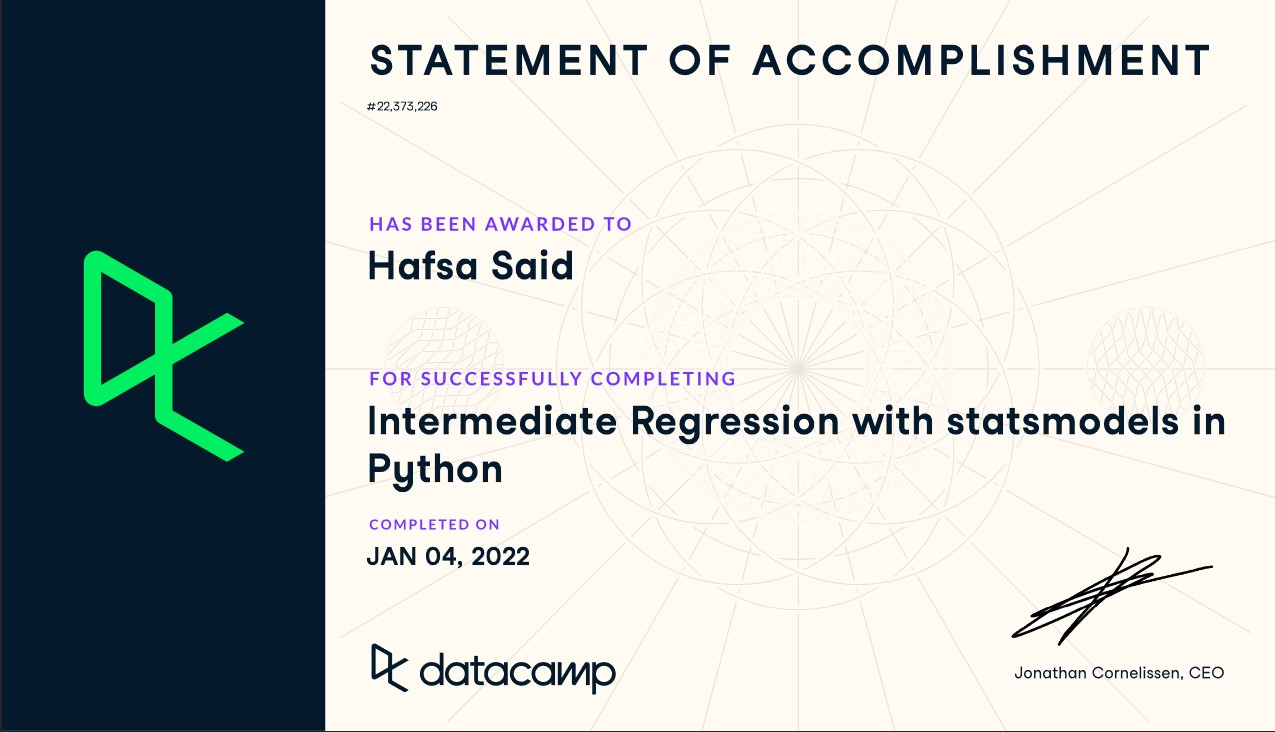